In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from src.fast_hough_transform import fast_hough_transform
from src.utils import *
from tqdm.notebook import tqdm

sns.set(font_scale=1.3)

### Применение алгоритма

In [2]:
path = './images'
angles = transform_images(path)

In [3]:
apply_and_save(path, angles)

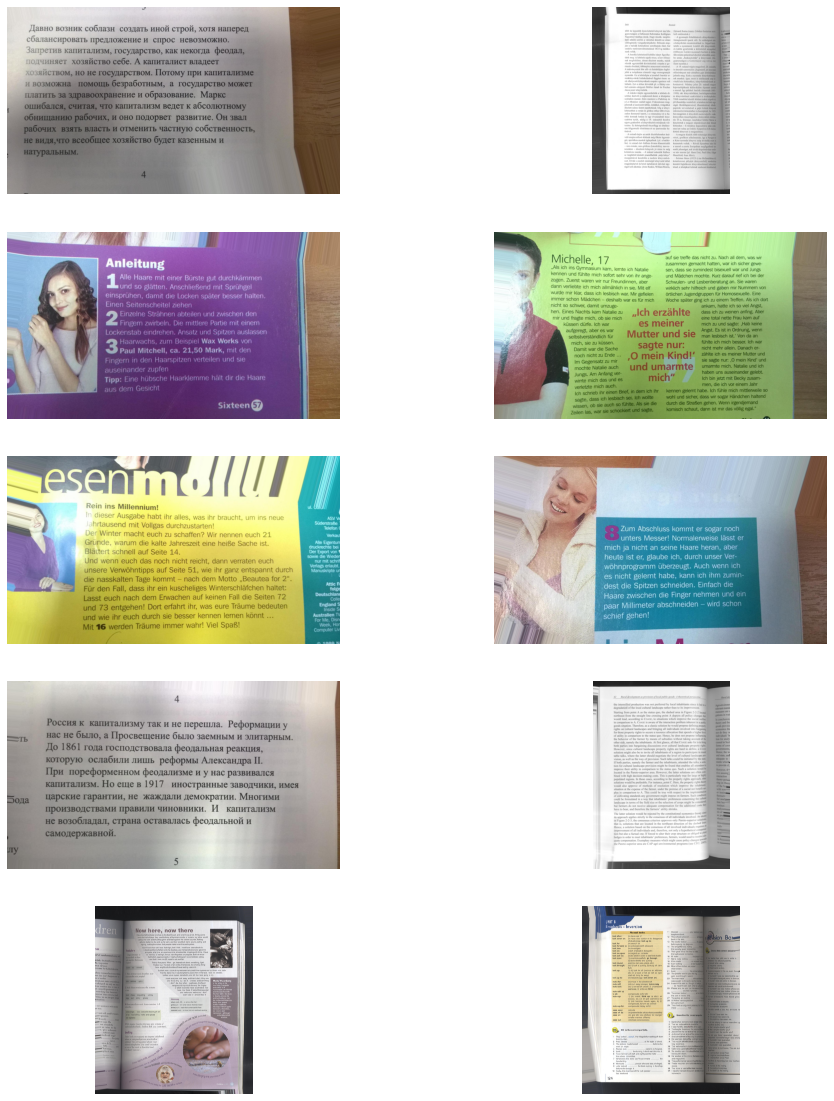

In [4]:
show_images('./transformed_images/billinear interpolation')

### Время работы

In [5]:
sizes = np.arange(64, 4096 + 64, 64).astype(int)
sizes = np.vstack((sizes, sizes)).T
times = []
for size in tqdm(sizes):
    random_image = np.random.uniform(0, 255, size)
    
    start = time.time()
    transform = fast_hough_transform(random_image)
    end = time.time()
    
    times.append(end - start)
    
times = np.array(times)

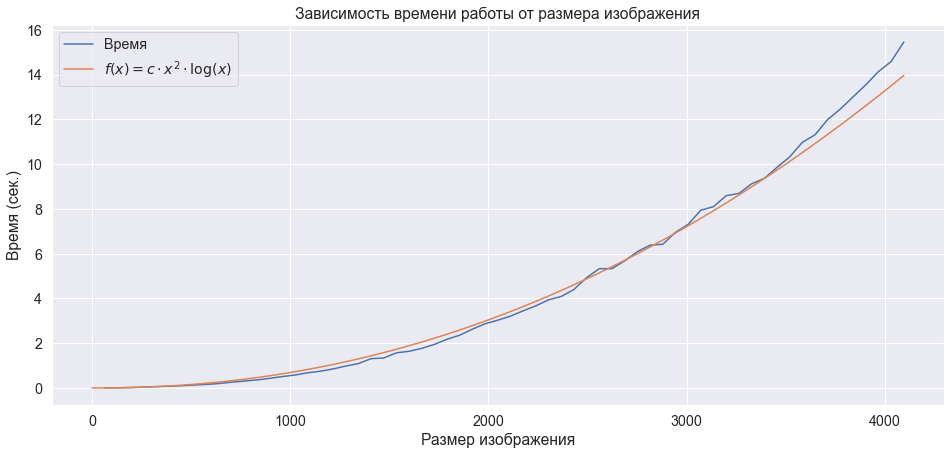

In [6]:
f = lambda x: x ** 2 * np.log(x) / 10 ** 7
x = np.arange(1, 4097)

plt.figure(figsize=(16, 7))
plt.title('Зависимость времени работы от размера изображения')
plt.plot(sizes[:, 0], times.round(2), label='Время')
plt.plot(x, f(x), label='$f(x) = c\cdot x^2 \cdot \\log(x)$')
plt.xlabel('Размер изображения')
plt.ylabel('Время (сек.)')
plt.legend()
plt.show()

**Сложность:** $O(n^2\log n)$